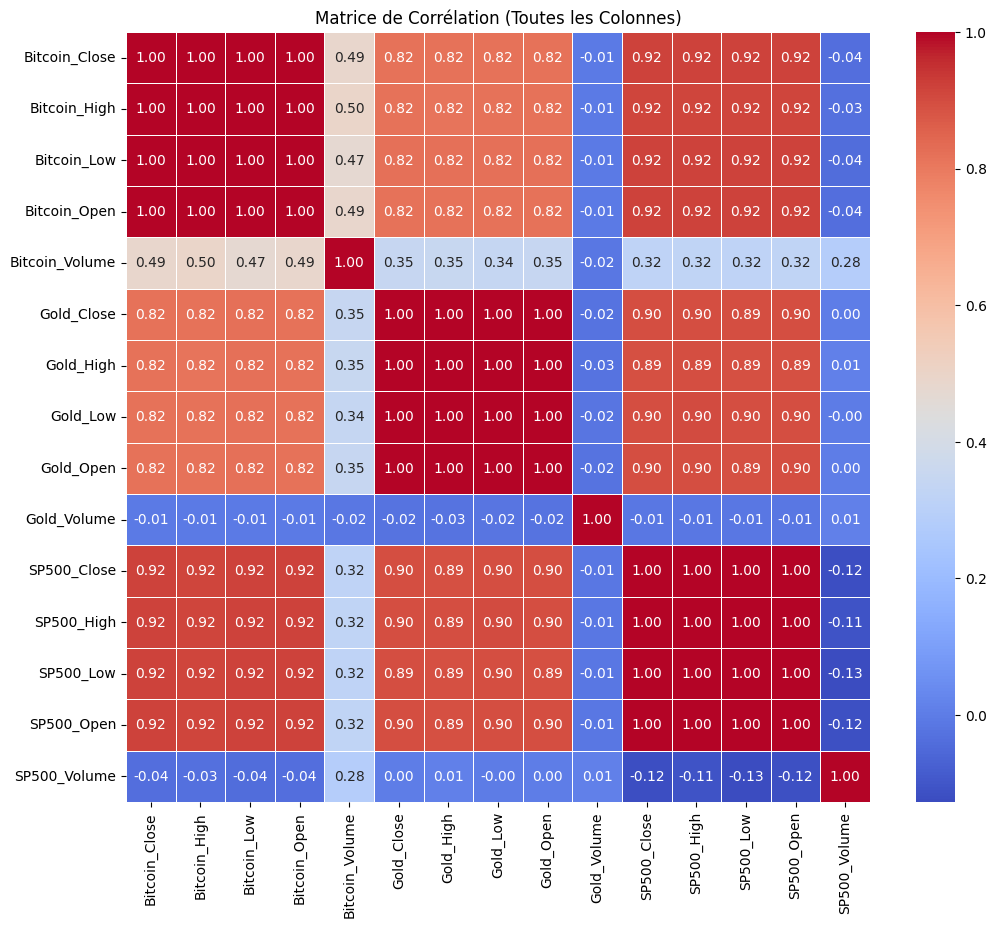

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

bitcoin_df = pd.read_csv("bitcoin_historical_data_cleaned.csv", parse_dates=["Date"], index_col="Date")
gold_df = pd.read_csv("gold_historical_data_cleaned.csv", parse_dates=["Date"], index_col="Date")
sp500_df = pd.read_csv("sp500_historical_data_cleaned.csv", parse_dates=["Date"], index_col="Date")

bitcoin_df = bitcoin_df.add_prefix("Bitcoin_")
gold_df = gold_df.add_prefix("Gold_")
sp500_df = sp500_df.add_prefix("SP500_")

merged_df = bitcoin_df.merge(gold_df, left_index=True, right_index=True, how="inner").merge(
    sp500_df, left_index=True, right_index=True, how="inner"
)
corr_matrix = merged_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de Corrélation (Toutes les Colonnes)")
plt.show()


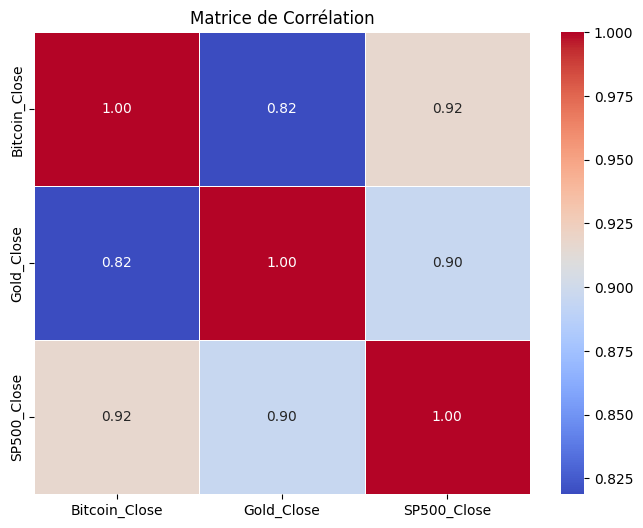

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

bitcoin_df = pd.read_csv("bitcoin_historical_data_cleaned.csv", parse_dates=["Date"], index_col="Date")
gold_df = pd.read_csv("gold_historical_data_cleaned.csv", parse_dates=["Date"], index_col="Date")
sp500_df = pd.read_csv("sp500_historical_data_cleaned.csv", parse_dates=["Date"], index_col="Date")

bitcoin_df.rename(columns={"Close": "Bitcoin_Close"}, inplace=True)
gold_df.rename(columns={"Close": "Gold_Close"}, inplace=True)
sp500_df.rename(columns={"Close": "SP500_Close"}, inplace=True)

merged_df = bitcoin_df[["Bitcoin_Close"]].merge(
    gold_df[["Gold_Close"]], left_index=True, right_index=True, how="inner"
).merge(
    sp500_df[["SP500_Close"]], left_index=True, right_index=True, how="inner"
)
corr_matrix = merged_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de Corrélation")
plt.show()


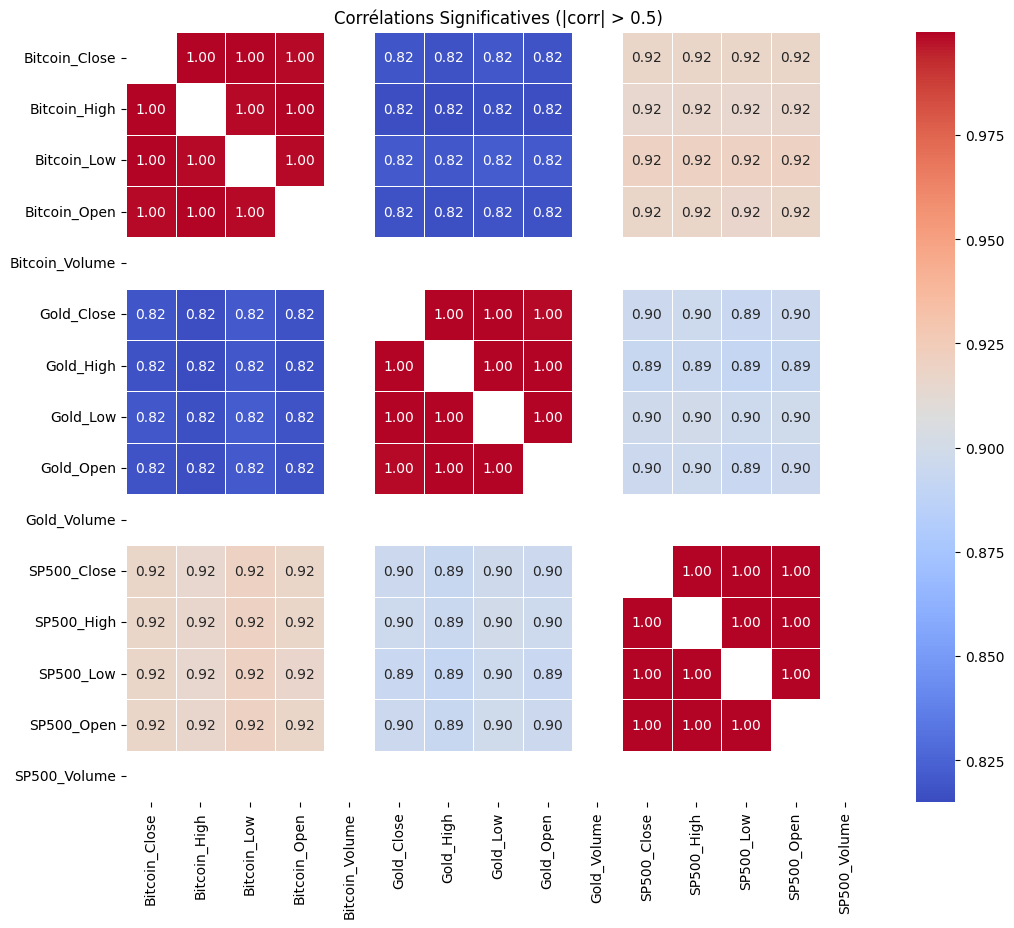

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

bitcoin_path = "bitcoin_historical_data_cleaned.csv"
gold_path = "gold_historical_data_cleaned.csv"
sp500_path = "sp500_historical_data_cleaned.csv"

bitcoin_df = pd.read_csv(bitcoin_path, parse_dates=["Date"], index_col="Date")
gold_df = pd.read_csv(gold_path, parse_dates=["Date"], index_col="Date")
sp500_df = pd.read_csv(sp500_path, parse_dates=["Date"], index_col="Date")

bitcoin_df = bitcoin_df.add_prefix("Bitcoin_")
gold_df = gold_df.add_prefix("Gold_")
sp500_df = sp500_df.add_prefix("SP500_")

merged_df = bitcoin_df.merge(gold_df, left_index=True, right_index=True, how="inner").merge(
    sp500_df, left_index=True, right_index=True, how="inner"
)
corr_matrix = merged_df.corr()
filtered_corr = corr_matrix[(corr_matrix.abs() > 0.5) & (corr_matrix != 1)]
plt.figure(figsize=(12, 10))
sns.heatmap(filtered_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, mask=np.isnan(filtered_corr))
plt.title("Corrélations Significatives (|corr| > 0.5)")
plt.show()
